# Gradient Descent for Linear Regression
#### It's called as Batch Gradient Descent. Every iteration of training it uses entire training data set, therefore called as Batch Gradient Descent.
#### Our Objective is to find the optimal value for parameters/coefficients (W- weight or slope & b - bias/intercept) by minimizing the cost function.

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement

Let's use below data point - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [90]:
## Prepare our data
x_train = np.array([1.0,2.0]) # Feature
y_train = np.array([300.0,500.0]) # Target

## Linear Regression For one variable/feature
$ \hat{y}_{w,b} = wx + b \tag{1} $
In linear regression, will use training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $\hat{y}_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training will measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (\hat{y}_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [97]:
## Create a function that computes the cost
def compute_cost(x,y,w,b):
    m = x.shape[0] # Training samples
    y_hat= w*x+b
    cost=(1/(2 * m)) * np.sum((y_hat - y) ** 2)
    return cost

    

In [98]:
### Let initialize the weight(w = 0.0) & bias b(b=0.0) and calculate cost
compute_cost(x_train,y_train,0.0,0.0)

85000.0

## Gradient descent summary
#### Gradient Descent calculate the partial derivative of cost fuction with respect to each parameter(i.e. w,b) and minimize the cost, by calculating the slope at each step and determine the direction it has to take that minimize the cost
#### Partial Derivate of cost function w.r.t 'w' eq 3:
#### Partial Derivate of cost function w.r.t 'b' eq 4:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{3}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}_{w,b}(x^{(i)}) - y^{(i)}) \tag{4}\\
\end{align}
$$

Parameters $w$, $b$ are updated simultaneously, where $\alpha$ is learning rate or step size
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{5}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [93]:
def compute_gradient(x,y,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    m = x.shape[0]
    y_hat= w*x + b
    dj_dw = (1/m) * np.sum((y_hat - y) * x)
    dj_db = (1/m) * np.sum(y_hat - y)
    
    return dj_dw,dj_db
    

In [94]:
compute_gradient(x_train,y_train,300.0,100.0)

(250.0, 150.0)

In [109]:
def plot_gradient(x,y,w,b=0.0):
    cost=[]
    grad_dw=[]
    grad_db=[]
    for i in w:
        cost.append(compute_cost(x,y,i,b))
        grad_dw.append(compute_gradient(x,y,i,b)[0])
        grad_db.append(compute_gradient(x,y,i,b)[1])
        
    return cost,grad_dw,grad_db
   
    
    

In [110]:
w=range(0,401,50)
cost,dw,db=plot_gradient(x_train,y_train,w,b=100)

Text(0, 0.5, 'Cost')

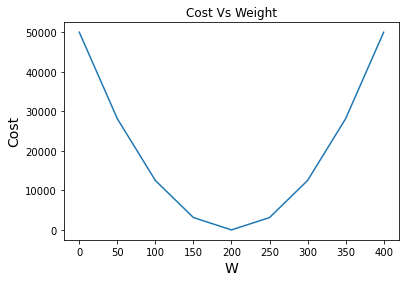

In [123]:
plt.plot(w,cost) # at w=200 we can see cost is minimum
plt.title("Cost Vs Weight")
plt.xlabel("W",fontsize=14)
plt.ylabel("Cost",fontsize=14)

In [175]:
def gradient_descent(x,y,w_in=0.0,b_in=0.0,alpha=0.01,n_iters=100):
    j_history=[] # to store cost for each iteration
    p_history=[] # to store values of w & b at each iteration
    w = w_in # set w to its initial value w_in
    b = b_in # set b to its initial value b_in
    for i in range(n_iters): # for iteration calculate cost & compute dw & db
        
        dw,db = compute_gradient(x,y,w,b)
        cost = compute_cost(x,y,w,b)    
        # update the w & b
        w = w - (alpha * dw)
        b = b - (alpha * db)

        if i < 100000:
            p_history.append([w,b])
            j_history.append(cost)
        # print cost at each 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration: {i}| Cost: {cost:0.2e}| dj_dw: {dw:0.3e} | dj_db: {db:0.3e} | w: {w} | b: {b:0.5e} ")
            
    print(f"Final (w,b) found by Gradient Descent at cost {j_history[-1]:0.5} are w:{w:0.5}, b: {b:0.5}")
    
    return w, b, j_history,p_history
        
        
    

In [177]:
w_in=0.0
b_in=0.0
iteration=10000
alpha= 1.0e-2
w_final,b_final,j_history,p_history=gradient_descent(x_train,y_train,w_in,b_in,alpha,iteration)

Iteration: 0| Cost: 8.50e+04| dj_dw: -6.500e+02 | dj_db: -4.000e+02 | w: 6.5 | b: 4.00000e+00 
Iteration: 1000| Cost: 3.42e+00| dj_dw: -3.712e-01 | dj_db: 6.007e-01 | w: 194.91482409389593 | b: 1.08228e+02 
Iteration: 2000| Cost: 7.94e-01| dj_dw: -1.789e-01 | dj_db: 2.895e-01 | w: 197.5488109193384 | b: 1.03966e+02 
Iteration: 3000| Cost: 1.84e-01| dj_dw: -8.625e-02 | dj_db: 1.396e-01 | w: 198.81846212990547 | b: 1.01912e+02 
Iteration: 4000| Cost: 4.29e-02| dj_dw: -4.158e-02 | dj_db: 6.727e-02 | w: 199.43046754349498 | b: 1.00922e+02 
Iteration: 5000| Cost: 9.96e-03| dj_dw: -2.004e-02 | dj_db: 3.243e-02 | w: 199.72547031523698 | b: 1.00444e+02 
Iteration: 6000| Cost: 2.31e-03| dj_dw: -9.660e-03 | dj_db: 1.563e-02 | w: 199.86766944191632 | b: 1.00214e+02 
Iteration: 7000| Cost: 5.38e-04| dj_dw: -4.657e-03 | dj_db: 7.535e-03 | w: 199.93621317629874 | b: 1.00103e+02 
Iteration: 8000| Cost: 1.25e-04| dj_dw: -2.245e-03 | dj_db: 3.632e-03 | w: 199.9692530664359 | b: 1.00050e+02 
Iteration: 

## Plot Cost per iteration

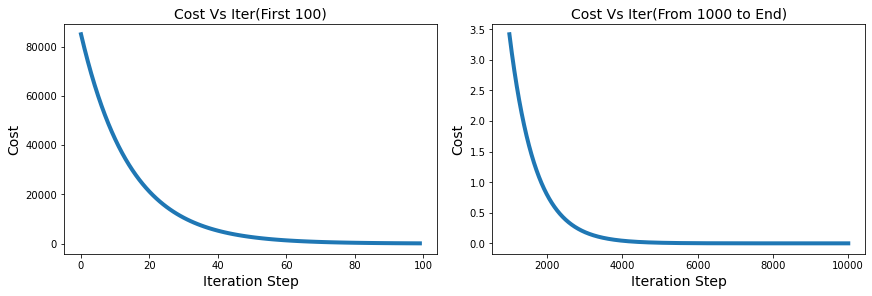

In [178]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4),constrained_layout=True)
ax1.plot(j_history[:100],linewidth=4)
ax2.plot(1000+np.arange(len(j_history[1000:])),j_history[1000:],linewidth=4)
ax1.set_title("Cost Vs Iter(First 100)", fontsize=14)
ax2.set_title("Cost Vs Iter(From 1000 to End)",fontsize=14)
ax1.set_xlabel("Iteration Step", fontsize=14)
ax1.set_ylabel("Cost", fontsize=14)
ax2.set_xlabel("Iteration Step", fontsize=14)
ax2.set_ylabel("Cost", fontsize=14)
plt.show()

### Prediction using model parameters(w & b)
$$ \hat{y} = w * x + b $$

In [186]:
def predict(x):
    y_hat = (w_final * x) + b_final
    return y_hat

In [188]:
x_pred=np.array([1.0,1.2,2.0]) # house size in 100 square feet
predict(x_pred)

array([300.00441848, 340.00298863, 499.99726923])